## The goal is to fit data to a Breit-Wigner distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
filename = 'BW_data.txt'
BW_data = np.loadtxt(filename)

Xs, Ys, sigs = BW_data.T

In [3]:
def bw_dist(mass, decay, energy):
    # the formula for the Breit-Wigner distribution
    return (mass**3 * decay)/((energy**2 - mass**2)**2 + (mass*decay)**2)

In [4]:
def chi_sq(massdecay):
    # takes an array, outputs the chi_sq value for b.w. distrib
    mass, decay = massdecay # tokenize the array
    
    Pis = bw_dist(mass, decay, Xs) # defined to make the next line nicer
    chi2 = np.sum(((Pis-Ys)/sigs) **2)
    return chi2

def min_chisq():
    M_Gamma_guess = [2.,1.0]
    
    M_Gamma = optimize.minimize(chi_sq, M_Gamma_guess, method='nelder-mead')    
    return M_Gamma.x

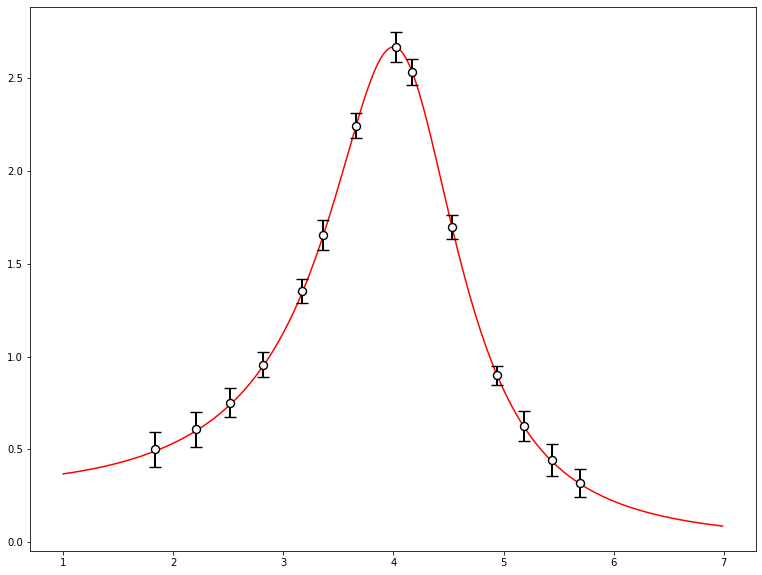

In [5]:
Es = np.arange(1, 7, 0.01) # some energy values.
# plotting the fit wrt Es instead of wrt Xs will give a smoother graph

m, gamma = min_chisq()

plt.figure(figsize=(13,10))

plt.errorbar(Xs, Ys, yerr= sigs, markersize=8,fmt='o',color='k',mfc='white',mec='k', elinewidth=2, capsize=6, mew=1.4,zorder=10)
plt.plot(Es, bw_dist(m, gamma, Es), color = 'r')